In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import scipy.stats as stats

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5, 10, 20, 50, 100]

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "REGION"})

In [4]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges')

In [5]:
ISO_names = pd.read_csv(os.path.join(obs_base,'ISO_IT_REGION.csv'))
ISO_names.head(2)

,REGION,ISO
0,Abruzzo,IT-650
1,Basilicata,IT-770


In [6]:
dir_in = os.path.join(obs_base, f'SAT_relative_error.csv')
SAT_RE = pd.read_csv(dir_in)

In [7]:
dir_in = os.path.join(obs_base, f'DOWN_relative_error.csv')
DOWN_RE = pd.read_csv(dir_in)

## Relative Error

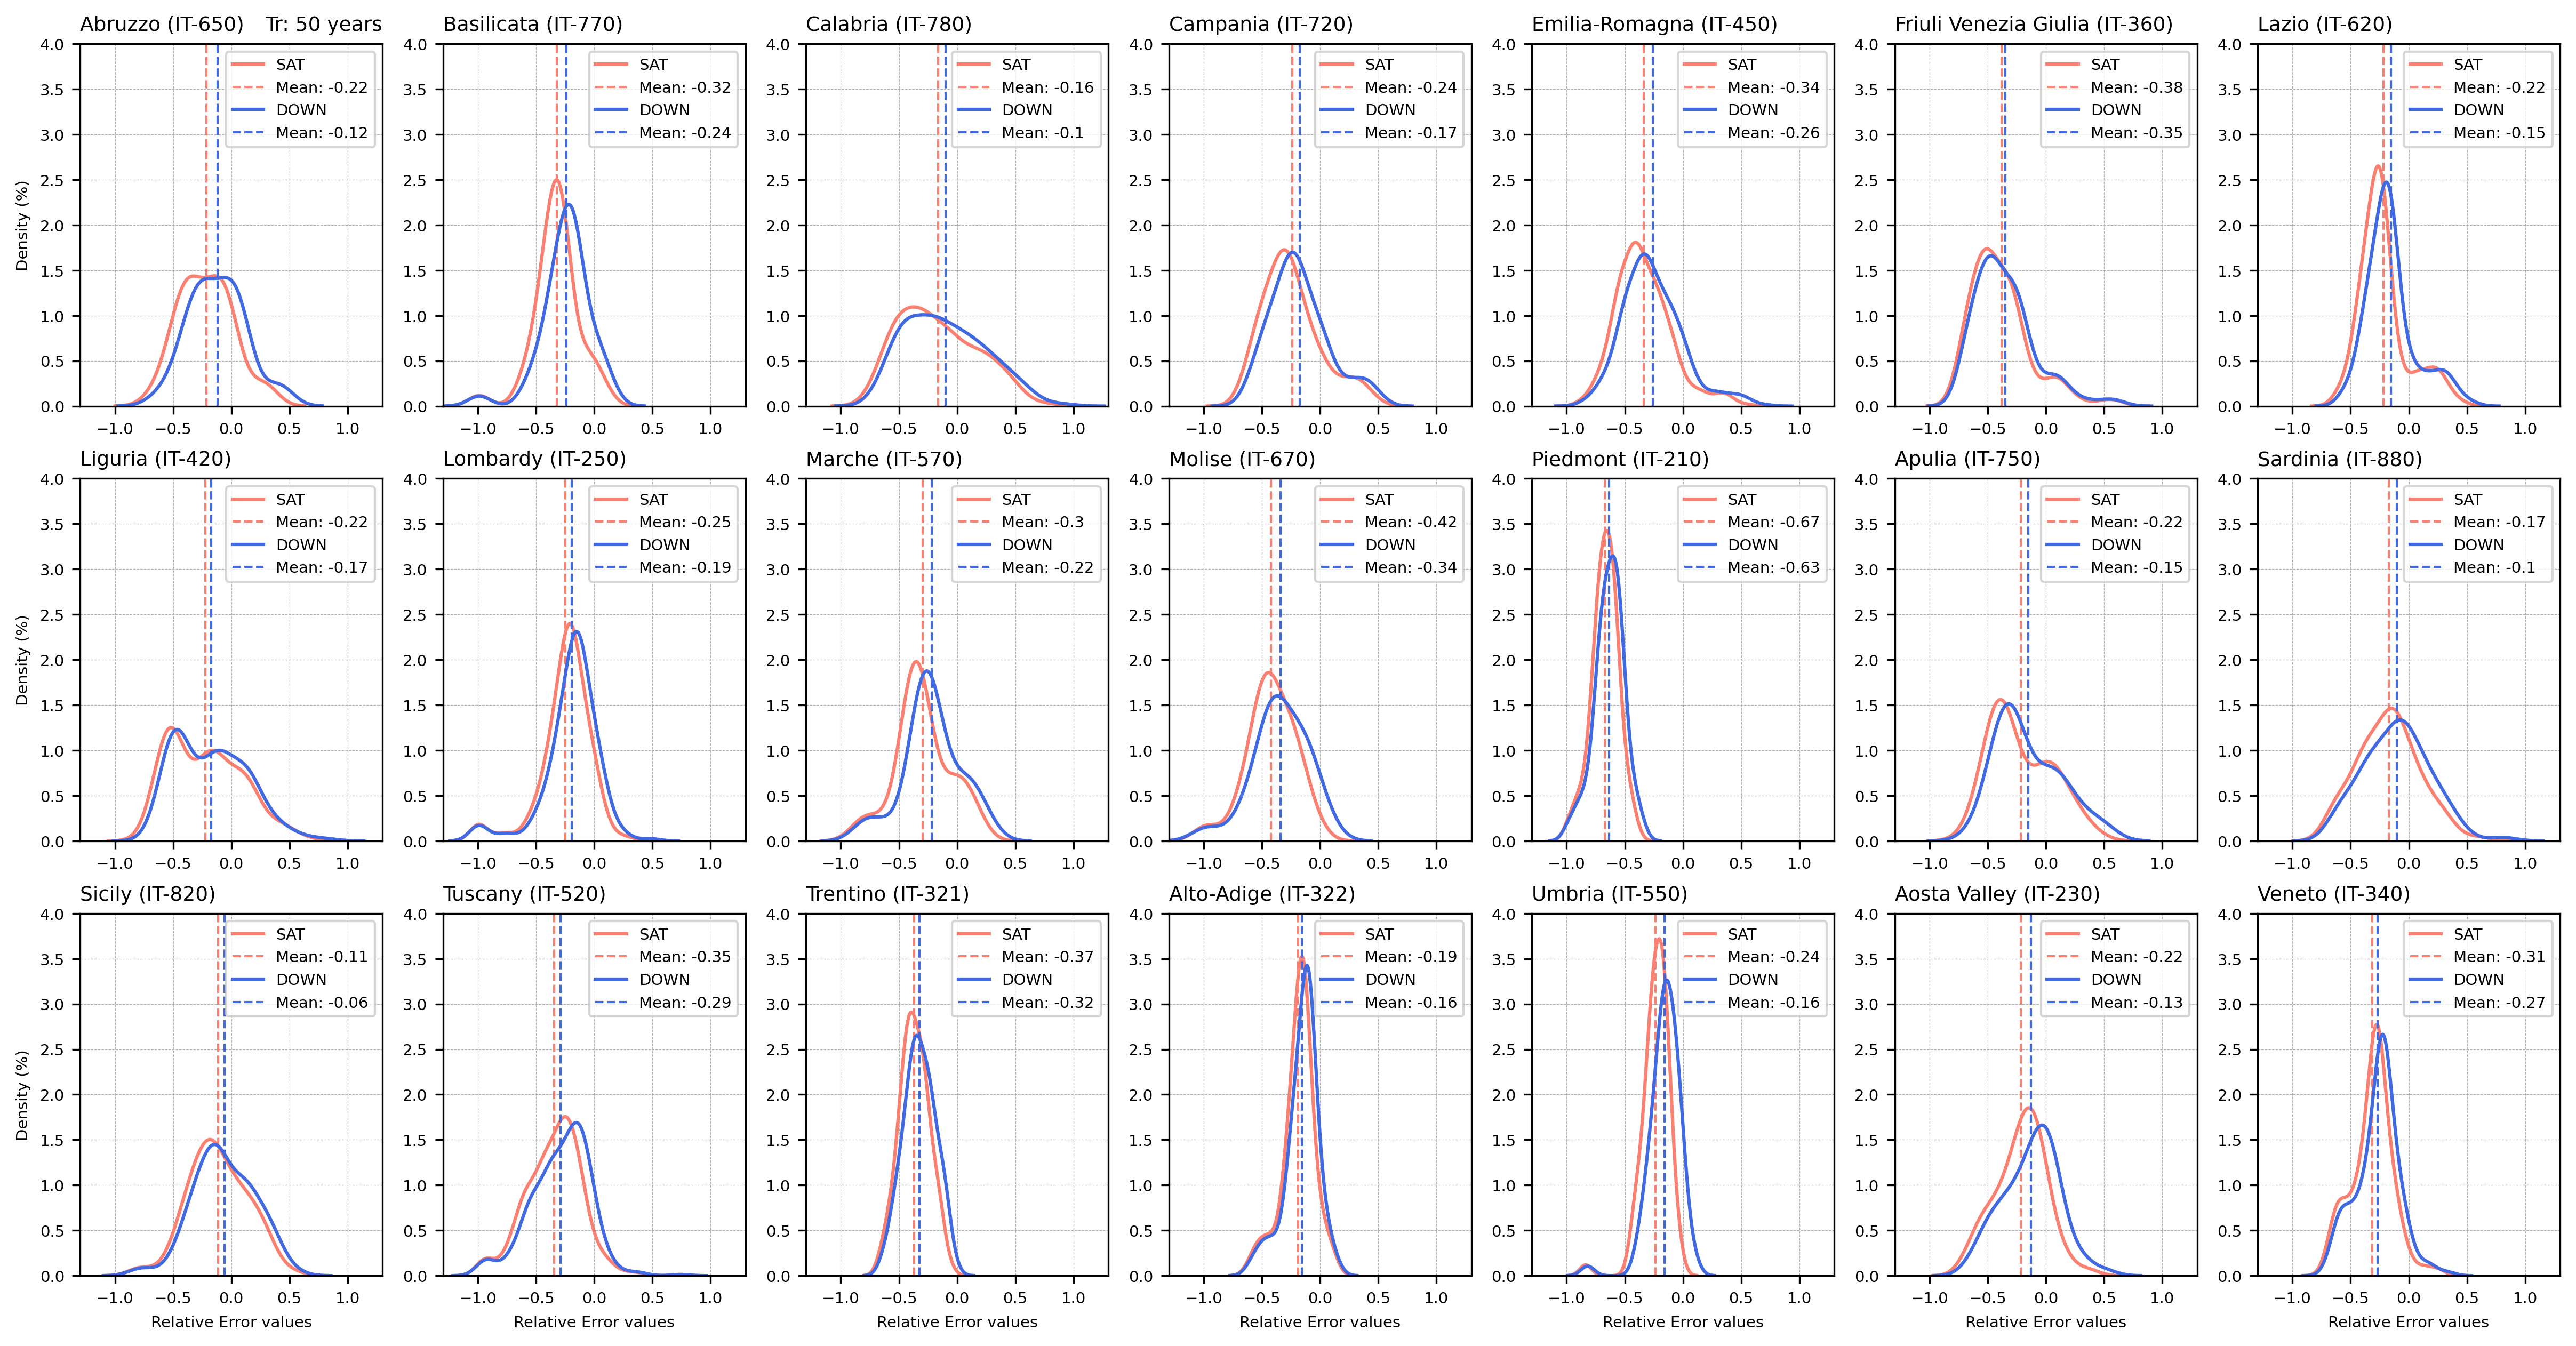

In [8]:
dict_keys = ISO_names['ISO'].values

fig = plt.figure(figsize=(20,10),dpi=300)
gs = gridspec.GridSpec(3,7)

pos = 0
for nrow in range(3):
    for ncol in range(7):
        ax1 = plt.subplot(gs[nrow, ncol])

        SAT_RE_mean = np.round(np.nanmean(SAT_RE[dict_keys[pos]]),2)
        sns.kdeplot(SAT_RE[dict_keys[pos]],color='salmon',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'SAT')
        ax1.axvline(np.nanmean(SAT_RE[dict_keys[pos]]),color='salmon',linestyle='--',linewidth=1, label=f'Mean: {SAT_RE_mean}')

        DOWN_RE_mean = np.round(np.nanmean(DOWN_RE[dict_keys[pos]]),2)
        sns.kdeplot(DOWN_RE[dict_keys[pos]],color='royalblue',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'DOWN')
        ax1.axvline(np.nanmean(DOWN_RE[dict_keys[pos]]),color='royalblue',linestyle='--',linewidth=1, label=f'Mean: {DOWN_RE_mean}')

        ax1.set_xlim(-1.3,1.3)
        ax1.set_ylim(0,4)
        ax1.legend(fontsize=7, loc=1, ncol=1)
        ax1.grid(linewidth=0.3, linestyle='--')
        ax1.tick_params(axis='both', which='major', labelsize=7)

        if ncol == 0:
            ax1.set_ylabel('')
            ax1.set_ylabel('Density (%)',fontsize=7)
            if nrow == 0:
                ax1.set_title(f'Tr: 50 years', fontsize=9, loc='right')
        else:
            ax1.set_ylabel('')

        if nrow == 2:
            ax1.set_xlabel('Relative Error values',fontsize=7) 
        else:
            ax1.set_xlabel('')

        region_l = ISO_names[ISO_names['ISO']==dict_keys[pos]].values[0][0]
        ISO_l = ISO_names[ISO_names['ISO']==dict_keys[pos]].values[0][1]
        ax1.set_title(f'{region_l} ({ISO_l})', fontsize=9, loc='left')

        pos += 1

## Boxplot

Text(1.0, 1.0, 'Return Time: 50 yrs')

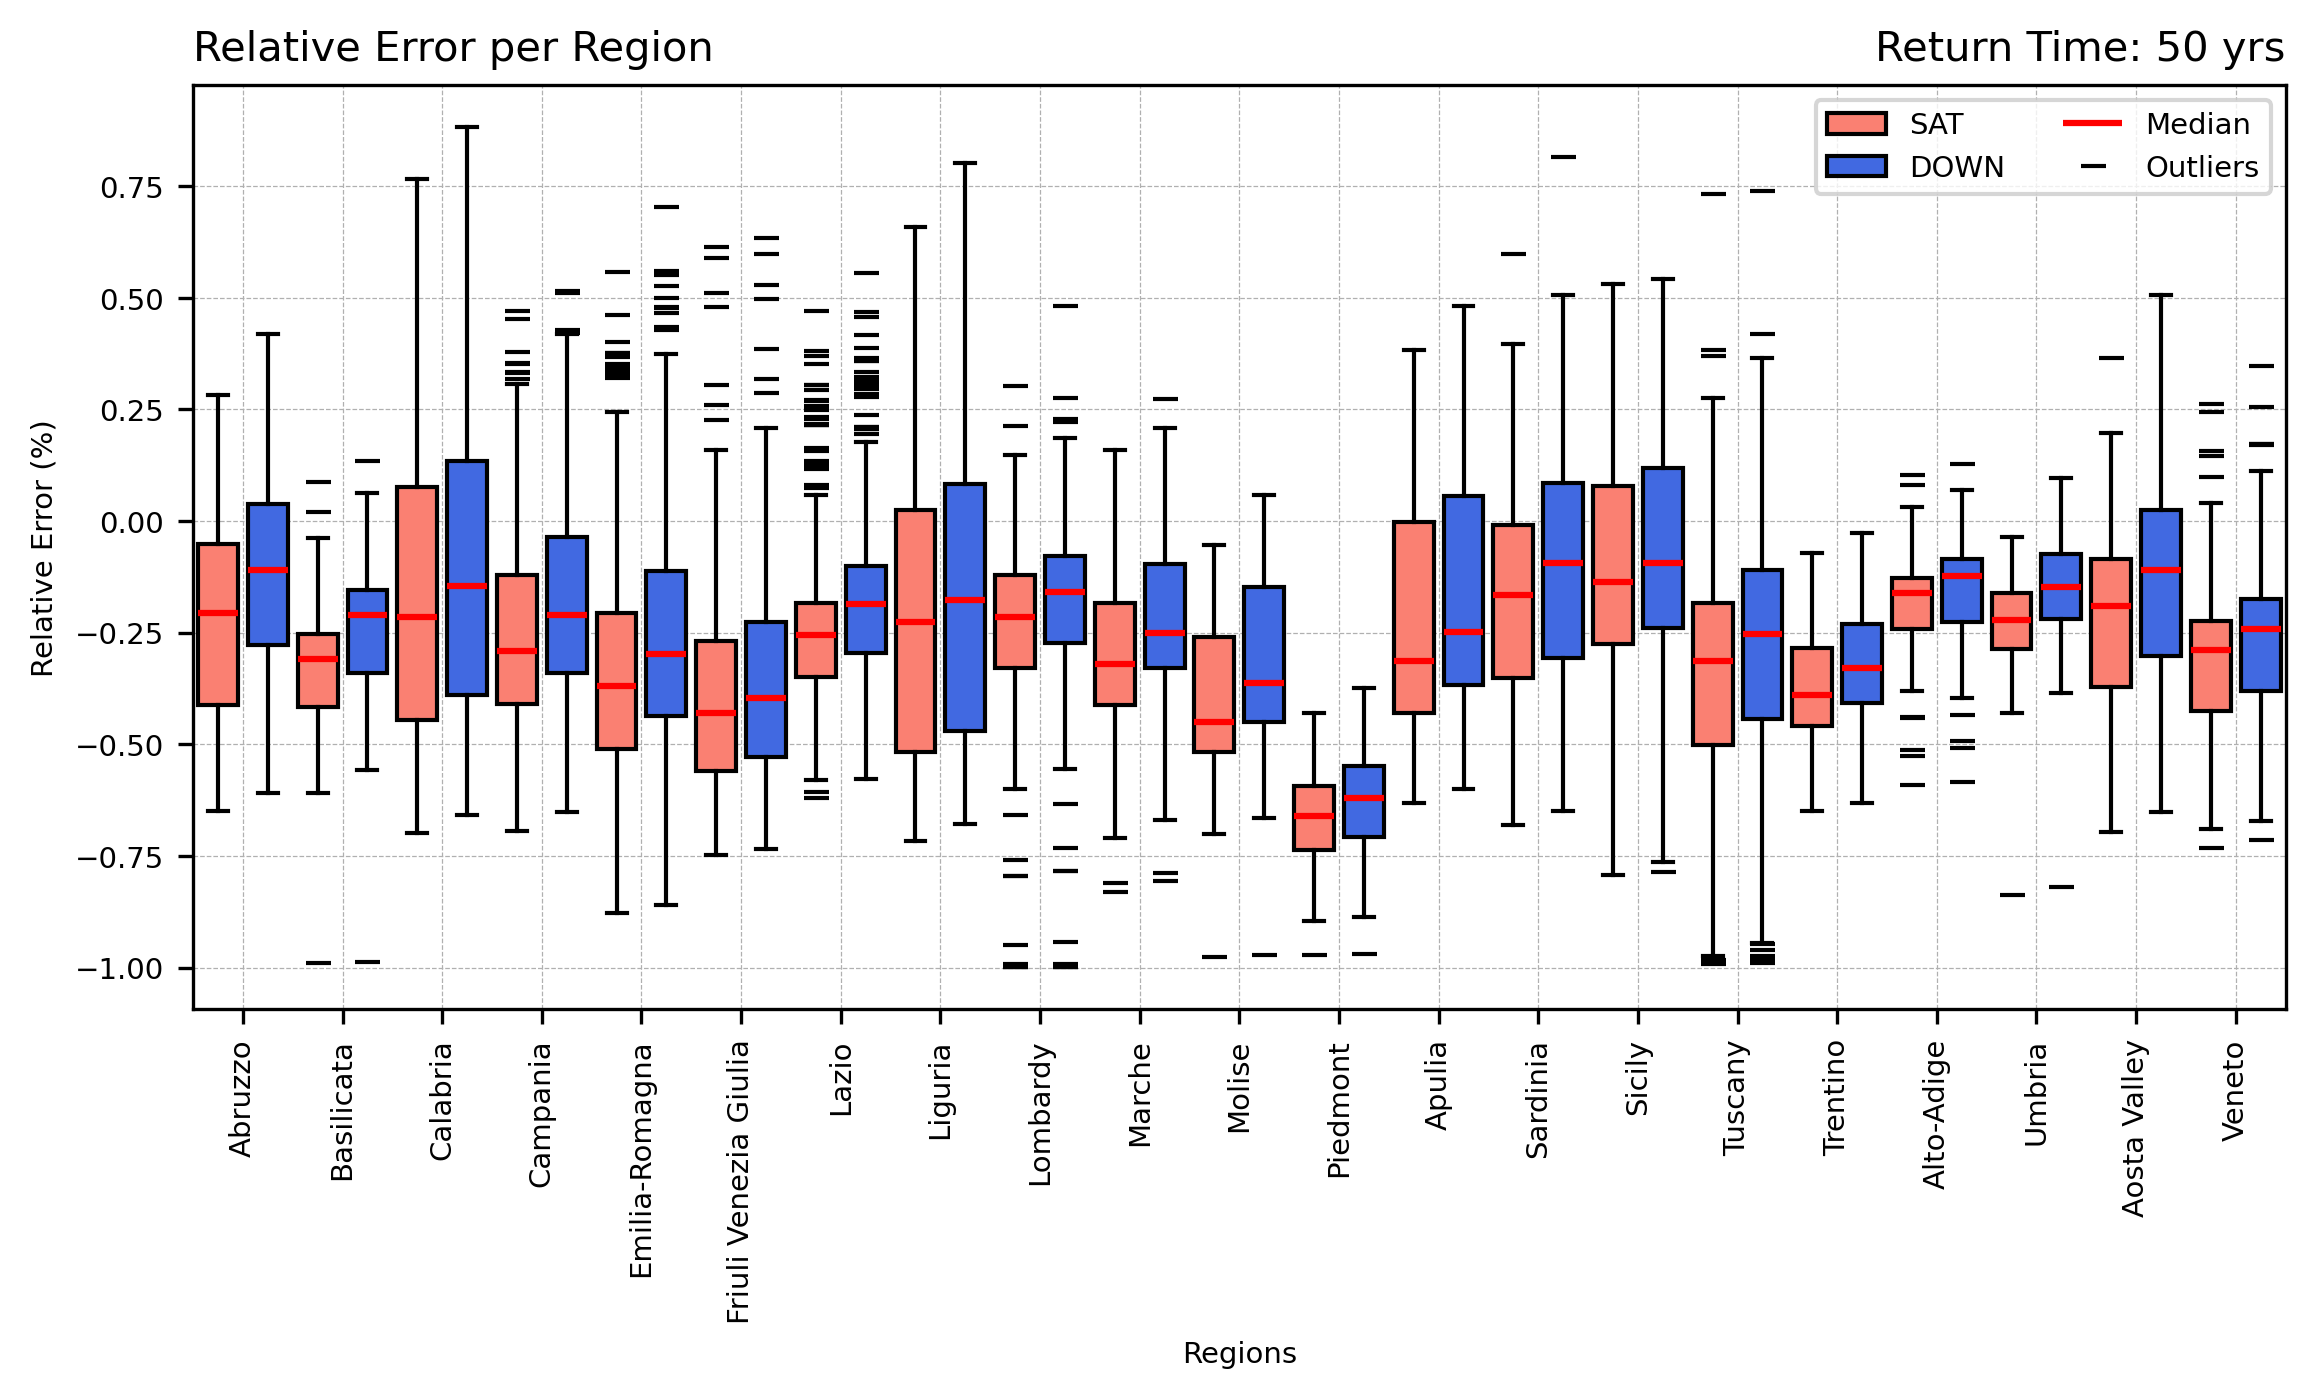

In [74]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(dict_keys)):

    SAT_tmp = SAT_RE[dict_keys[pos]]
    SAT_tmp = SAT_tmp[~np.isnan(SAT_tmp)]
    SAT_box = ax1.boxplot(SAT_tmp,positions=[2*pos],
    widths=box_width,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

    DOWN_tmp = DOWN_RE[dict_keys[pos]]
    DOWN_tmp = DOWN_tmp[~np.isnan(DOWN_tmp)]
    DOWN_box = ax1.boxplot(DOWN_tmp,positions=[2*pos+1],
    widths=box_width,boxprops=DOWN_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

    SAT_boxes.append(SAT_box["boxes"][0])
    DOWN_boxes.append(DOWN_box["boxes"][0])
    medians.append(SAT_box["medians"][0])
    fliers.append(SAT_box["fliers"][0])

ax1.plot([],[],linestyle='-',c='r',label='Median')
ax1.plot([],[],linestyle='-',c='k',label='Outliers')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(ISO_names['REGION'].values, rotation='vertical')

ax1.grid(linewidth=0.3, linestyle='--')

ax1.legend([SAT_boxes[0], DOWN_boxes[0], medians[0], fliers[0]],
        ['SAT', 'DOWN', 'Median', 'Outliers'], 
        ncol=2,fontsize=7,loc=1)

ax1.set_ylabel('Relative Error (%)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

ax1.set_title('Relative Error per Region', fontsize=10, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=10, loc='right')

## Mean Relative Error

In [59]:
SAT_mean = []
SAT_median = []
DOWN_mean = []
DOWN_median = []
for pos in range(len(ISO_names)):
    SAT_mean.append(float(np.nanmean(SAT_RE[ISO_names['ISO'].values[pos]])))
    SAT_median.append(float(np.nanmedian(SAT_RE[ISO_names['ISO'].values[pos]])))
    DOWN_mean.append(float(np.nanmean(DOWN_RE[ISO_names['ISO'].values[pos]])))
    DOWN_median.append(float(np.nanmedian(DOWN_RE[ISO_names['ISO'].values[pos]])))

ISO_names['SAT_RE_mean'] = SAT_mean
ISO_names['DOWN_RE_mean'] = DOWN_mean
ISO_names['SAT_RE_median'] = SAT_median
ISO_names['DOWN_RE_median'] = DOWN_median

Text(0.0, 1.0, '(b) Median Relative Error per Region')

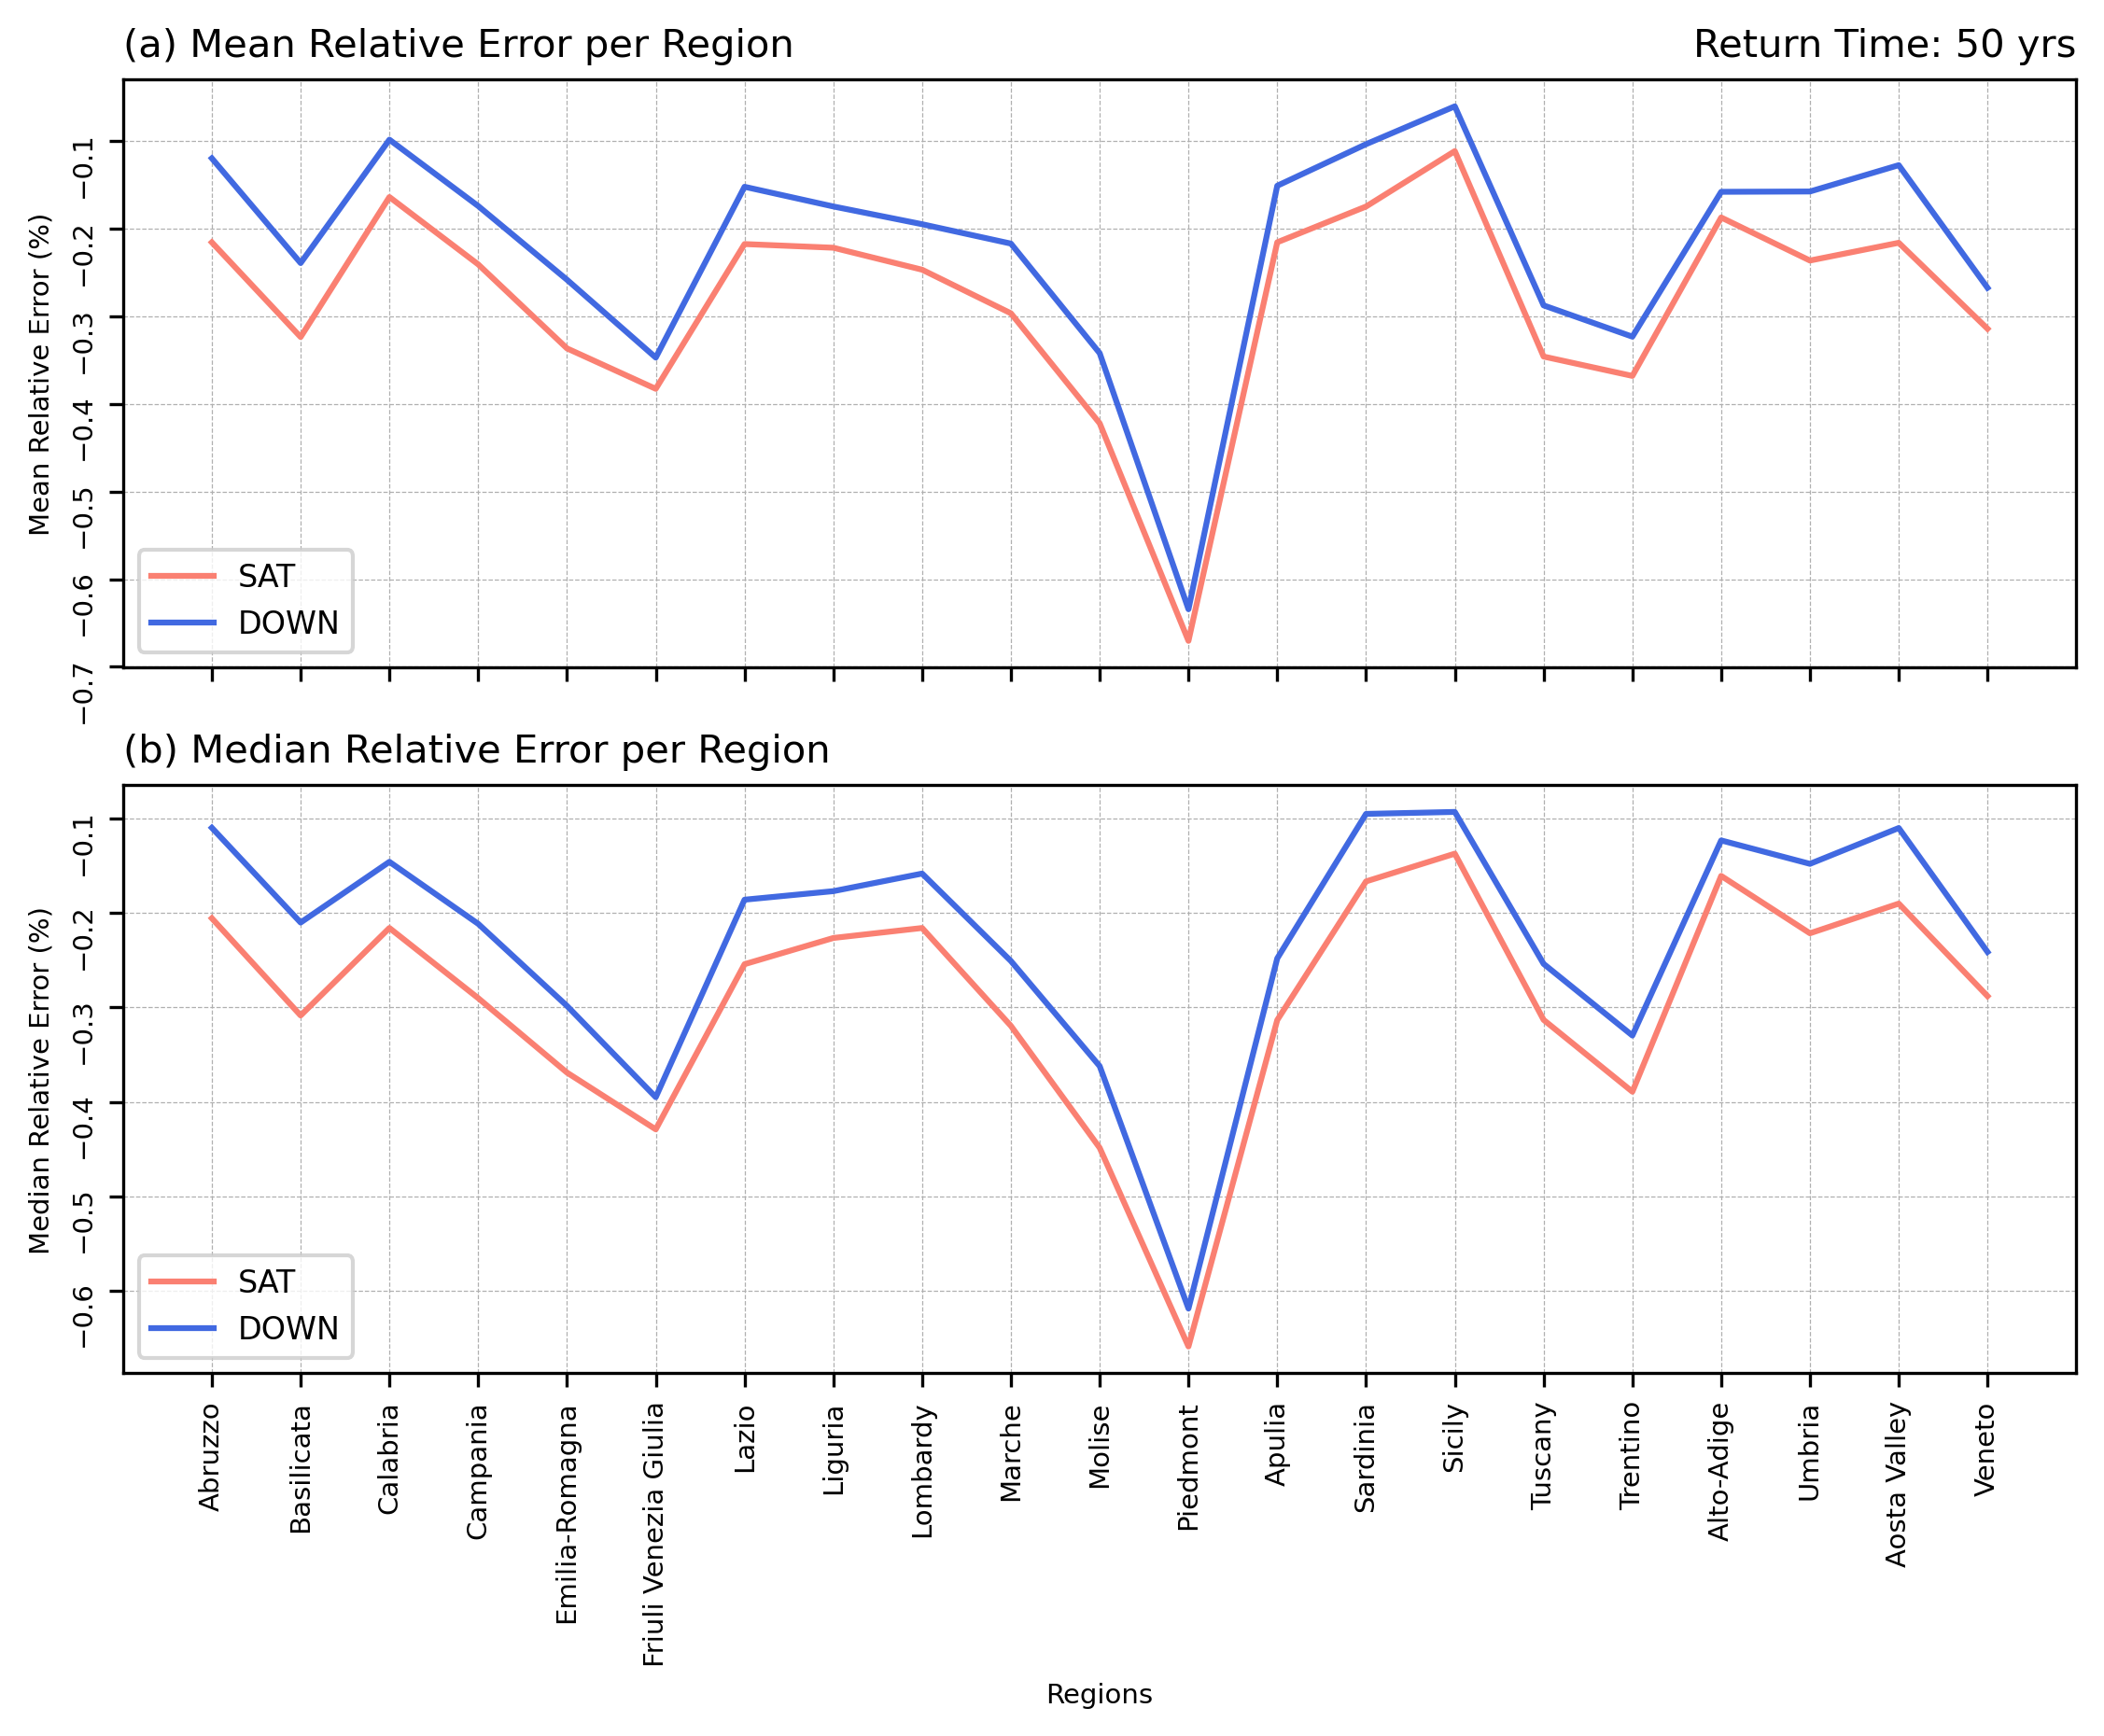

In [71]:
fig = plt.figure(figsize=(9,6),dpi=300)
gs = gridspec.GridSpec(2,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(ISO_names['SAT_RE_mean'].index, ISO_names['SAT_RE_mean'].values, c='salmon', label='SAT')
ax1.plot(ISO_names['DOWN_RE_mean'].index, ISO_names['DOWN_RE_mean'].values, c='royalblue', label='DOWN')

ax1.set_ylabel('Mean Relative Error (%)', fontsize=7)

ax1.set_xticks(ISO_names['SAT_RE_mean'].index)
ax1.set_xticklabels([])

ax1.grid(linewidth=0.3, linestyle='--')
ax1.legend(ncol=1,fontsize=8,loc=3)
ax1.tick_params(axis='both', which='major', labelsize=7, labelrotation=90)

ax1.set_title('(a) Mean Relative Error per Region', fontsize=10, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=10, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0])
ax1.plot(ISO_names['SAT_RE_median'].index, ISO_names['SAT_RE_median'].values, c='salmon', label='SAT')
ax1.plot(ISO_names['DOWN_RE_median'].index, ISO_names['DOWN_RE_median'].values, c='royalblue', label='DOWN')

ax1.set_ylabel('Median Relative Error (%)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

ax1.set_xticks(ISO_names['SAT_RE_median'].index)
ax1.set_xticklabels(ISO_names['REGION'])

ax1.grid(linewidth=0.3, linestyle='--')
ax1.legend(ncol=1,fontsize=8,loc=3)
ax1.tick_params(axis='both', which='major', labelsize=7, labelrotation=90)

ax1.set_title('(b) Median Relative Error per Region', fontsize=10, loc='left')

## Fusion Trentino and Alto-Adige	

In [11]:
filtro = ISO_names["REGION"].isin(["Alto-Adige", "Trentino"])
df_fusion = ISO_names.loc[filtro, ["SAT_RE_mean", "DOWN_RE_mean"]].mean()

In [12]:
nueva_fila = pd.DataFrame({
    "REGION": ["Trentino"],
    "ISO": ["IT-32"], 
    "SAT_RE_mean": [df_fusion["SAT_RE_mean"]],
    "DOWN_RE_mean": [df_fusion["DOWN_RE_mean"]]
})

ISO_names_clear = pd.concat([ISO_names.loc[~filtro], nueva_fila], ignore_index=True)
ISO_names_clear.tail(2)

,REGION,ISO,SAT_RE_mean,DOWN_RE_mean
18,Veneto,IT-340,-0.313952,-0.267207
19,Trentino,IT-32,-0.277353,-0.240299


## Spatial Mean Relative Error

In [13]:
REGIONS_merged = REGIONS.merge(ISO_names, on="REGION")
REGIONS_merged.head(3)

,REGION,reg_istat_code_num,reg_istat_code,geometry,ISO,SAT_RE_mean,DOWN_RE_mean
0,Piedmont,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.2804, 7...",IT-210,-0.670351,-0.634200
1,Aosta Valley,2,02,"POLYGON ((7.73455 45.92365, 7.7359 45.92744, 7...",IT-230,-0.215789,-0.127166
2,Lombardy,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",IT-250,-0.246544,-0.194577


In [57]:
cmap="Reds_r"
CBAR_vals = plt.cm.ScalarMappable(
    cmap=cmap,
    norm=plt.Normalize(
        vmin=np.nanmin([REGIONS_merged["SAT_RE_mean"].min(),REGIONS_merged["DOWN_RE_mean"].min()]),
        vmax=np.nanmax([REGIONS_merged["SAT_RE_mean"].max(),REGIONS_merged["DOWN_RE_mean"].max()])))

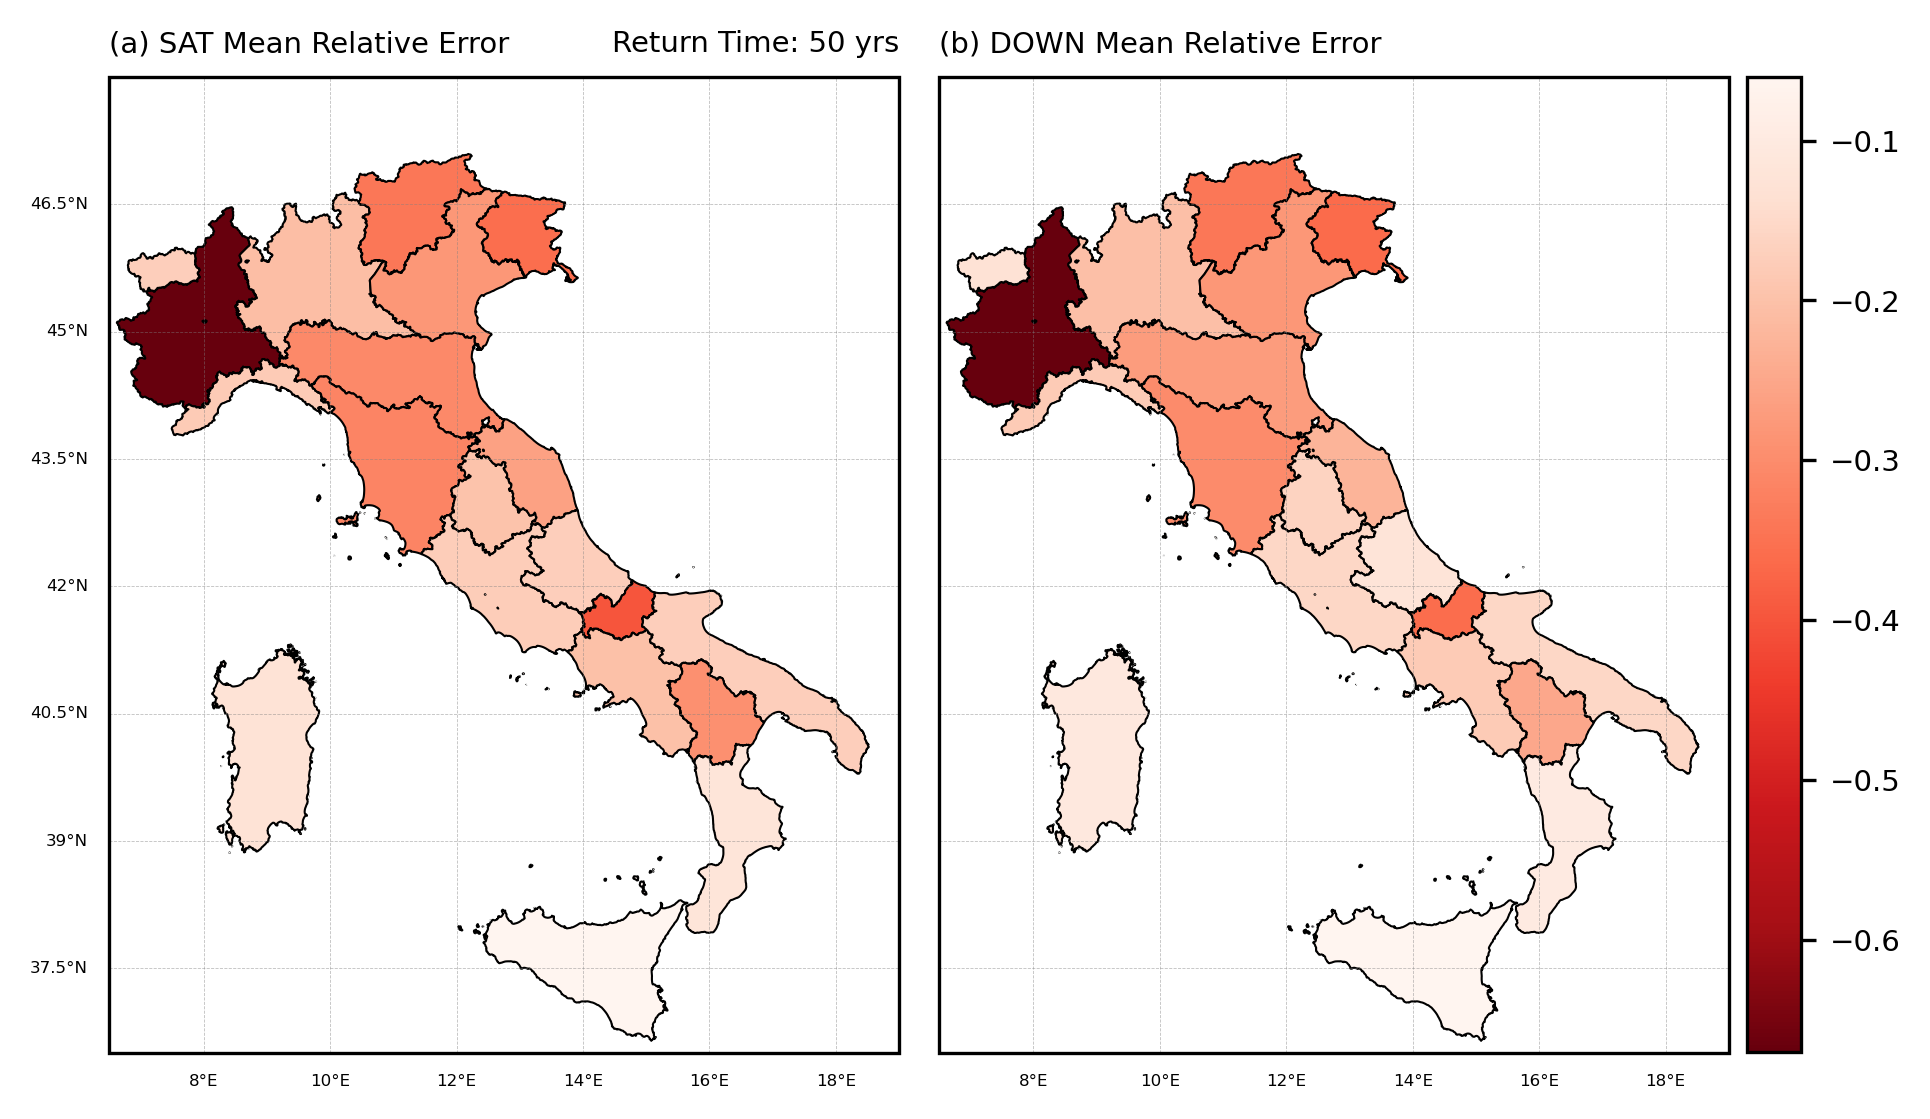

In [70]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,4),dpi=300)
gs = gridspec.GridSpec(1,2)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="SAT_RE_mean", cmap=cmap,legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# CBAR = plt.colorbar(
#     CBAR_vals,
#     ax=ax1,
#     ticks=np.round(ticks_level, 2),
#     fraction=0.056,
#     pad=0.03,
#     orientation="vertical")
# CBAR.ax.tick_params(labelsize=7) 

ax1.set_title('(a) SAT Mean Relative Error', fontsize=7, loc='left')
ax1.set_title('Return Time: 50 yrs', fontsize=7, loc='right')

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

im = REGIONS_merged.plot(column="DOWN_RE_mean", cmap=cmap,legend=False, edgecolor="black", linewidth=0.5, ax=ax1)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False

gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# CBAR = plt.colorbar(
#     CBAR_vals,
#     ax=ax1,
#     ticks=np.round(ticks_level, 2),
#     fraction=0.056,
#     pad=0.03,
#     orientation="vertical")
# CBAR.ax.tick_params(labelsize=7) 

ax1.set_title('(b) DOWN Mean Relative Error', fontsize=7, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.1)

cbar_ax = fig.add_axes([0.96, 0.094, 0.03, 0.813])#0.96
cbar = fig.colorbar(CBAR_vals, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=7)